In [1]:
import pandas as pd 

In [2]:
beef = pd.read_excel('beef_sales.xlsx')
beef.head(4)

,Year,Quarter,Quantity,Price
0,1977,1,22.9976,142.1667
1,1977,2,22.6131,143.9333
2,1977,3,23.4054,146.5000
3,1977,4,22.7401,150.8000


In [3]:
beef.tail(5)

,Year,Quarter,Quantity,Price
86,1998,3,17.5085,277.3667
87,1998,4,16.6475,279.5333
88,1999,1,16.6785,278.0000
89,1999,2,17.7635,284.7667
90,1999,3,17.6689,289.2333


In [4]:
import numpy as np
from pandas import DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
%matplotlib inline

# equations for price optimization

Revenue = Quantity * Price (1)


profit = Revenue - cost (2)

profit = quantity * Price  - cost  (3)

D:\Anaconda\lib\site-packages\seaborn\regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


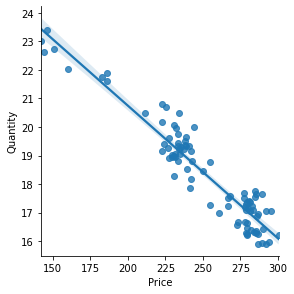

In [7]:
# demand curve
sns.lmplot(x = "Price", y = "Quantity", 
data = beef, size = 4)

In [8]:
# fit OLS model
model = ols("Quantity ~ Price", data = beef).fit()
# print model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               Quantity   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     811.2
Date:                Mon, 25 Jul 2022   Prob (F-statistic):           1.69e-46
Time:                        15:49:39   Log-Likelihood:                -77.493
No. Observations:                  91   AIC:                             159.0
Df Residuals:                      89   BIC:                             164.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.0515      0.413     72.701      0.0

### The coefficient we are looking for is coming from the regression model above — the intercept and the price coefficient — to measure the corresponding sales quantity. We can now plug these values into equation 3.

In [12]:
# plugging regression coefficients
price = 0
cost = 0
quantity = 30.0515 - 0.0465 * price # eq (5)
# the profit function in eq (3) becomes
profit = (30.05 - 0.0465 * price) * price - cost # eq (6)

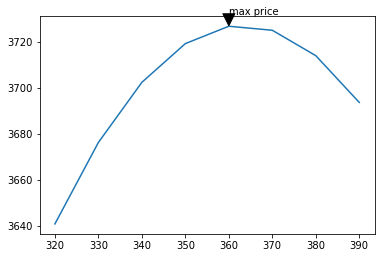

In [21]:
# a range of diffferent prices to find the optimum one
Price = [320, 330, 340, 350, 360, 370, 380, 390]
# assuming a fixed cost
cost = 80
Revenue = []
for i in Price:
    quantity_demanded = 30.05 - 0.0465 * i
   
   # profit function
    Revenue.append((i-cost) * quantity_demanded)
# create data frame of price and revenue
profit = pd.DataFrame({"Price": Price, "Revenue": Revenue})
fig = plt.figure()
ax = fig.add_subplot(111)
#plot revenue against price
ymax= max(Revenue)
xpos = Revenue.index(ymax)
xmax = Price[xpos]

ax.annotate('max price', xy=(xmax, ymax), xytext=(xmax, ymax+5),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
plt.plot(profit["Price"], profit["Revenue"])

In [18]:
# price at which revenue is maximum
profit[profit['Revenue']==profit['Revenue'].max()]

,Price,Revenue
4,360,3726.8
